# Report

---

In this notebook, DQN agent is trained for navigation environment.

In [1]:
%matplotlib inline
import torch
import numpy as np

from matplotlib import pyplot as plt
from collections import deque
from unityagents import UnityEnvironment

from dqn_agent import Agent
from opt import opt
from train_agent import train_agent
from infer_agent import infer_agent
from utils import get_settings

### 1. Loading environment and Agent

In [2]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
state_size, action_size = get_settings(env_info, brain)
agent = Agent(state_size, action_size, opt.seed)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 2. Hyper-parameters to use

* n_episodes: maximum number of training episodes
* eps_start: starting value of epsilon
* eps_end: minimum value of epsilon
* eps_decay: rate to decay epsilon
* success_score: score condition to success, in this project at least 13

In [4]:
n_episodes=2000
eps_start=1.0
eps_end=0.01
eps_decay=0.995
success_score=13

### 3. Learning algorithm

In this project, DQN is used for training an agent. 

DQN overcomes unstable learning with 2 techniques mainly: experience replay, target network

#### Experience replay

In order to train DNN, training examples assumed to be extracted from IID random variable. However, in Q-Learning agent get correlated experiences, which makes DNN easily overfit current episodes. Once DNN is overfitted, it’s hard to produce various experiences. 

To solve this problem, Experience Replay stores experiences including state transitions, rewards and actions, which are necessary data to perform Q learning, and makes mini-batches to update neural networks. 

In consequence, experience replay helps:
* reduces correlation between experiences in updating DNN
* increases learning speed with mini-batches
* reuses past transitions to avoid catastrophic forgetting

#### Target network

In TD error calculation, target function is changed frequently with DNN so that training becomes unstable. 

Target Network technique fixes parameters of target function and replaces them with the latest network for specific period.

Thus, target network helps:

* make training more stable

### 4. Train an agent

Episode 100	Average Score: 1.31
Episode 200	Average Score: 4.71
Episode 300	Average Score: 8.46
Episode 400	Average Score: 10.66
Episode 500	Average Score: 12.68
Episode 512	Average Score: 13.00
Environment solved in 412 episodes!	Average Score: 13.00


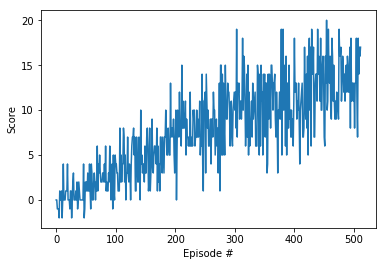

In [5]:
scores = train_agent(env, agent, brain_name, n_episodes, eps_start, eps_end, eps_decay, success_score)
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

With seed 0, this DQN agent solves the task in 412 episodes. The following figure is the plot of average scores along episodes.

![title](figures/plot_avg_scores.png)

### 5. Infer an agent

#### Loading environment and agent for infer

Agent will act with Q-network loaded by pre-trained checkpoint

In [3]:
model_path = 'checkpoint.pth'
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=False)[brain_name]
state_size, action_size = get_settings(env_info, brain)
agent = Agent(state_size, action_size, opt.seed, model_path)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


In [4]:
n_episodes=500

Episode 100	Average Score: 13.17
Episode 200	Average Score: 13.54
Episode 300	Average Score: 13.75
Episode 400	Average Score: 13.79
Episode 500	Average Score: 13.31


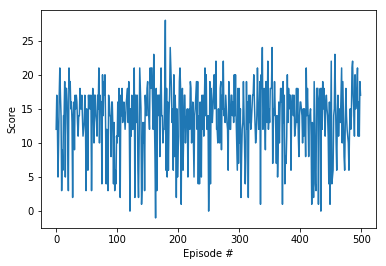

In [5]:
scores = infer_agent(env, agent, brain_name, n_episodes)
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

With seed 0, this DQN agent get average scores of 100 episodes from 13.17~13.79. The following figure is the plot of average scores along episodes.

![title](figures/plot_avg_scores_infer.png)

When finished, you can close the environment.

In [6]:
env.close()